In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
dataset_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
retail = pd.read_csv(dataset_url, sep=',', encoding = 'latin1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


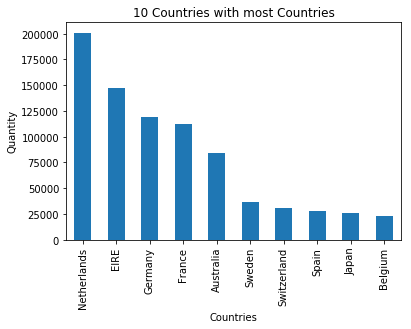

In [36]:
retailByCountry = retail.groupby(by='Country').sum()
retailByCountry = retailByCountry.sort_values(by='Quantity', ascending=False)[1:11]
retailByCountry = retailByCountry['Quantity']

retailByCountry.plot(kind = 'bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most Countries')
plt.show()

In [37]:
retail = retail[retail.Quantity > 0]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/tigerit/.virtualenvs/PracticePandas/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


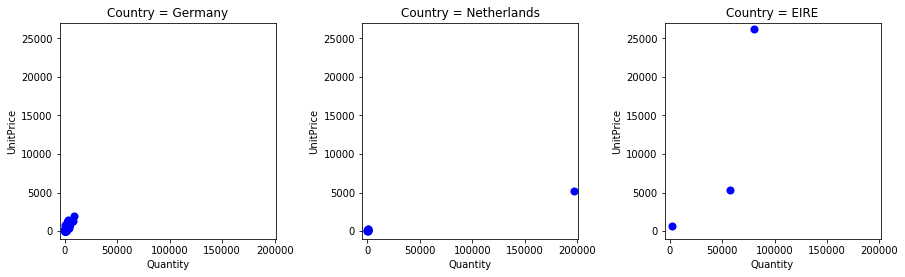

In [92]:
AllCustomer = retail.groupby(by=['CustomerID', 'Country']).sum()
AllCustomer = AllCustomer[AllCustomer.UnitPrice > 0]
AllCustomer['Country'] = AllCustomer.index.get_level_values(1)
retailByCustomerID = AllCustomer[AllCustomer['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]

figure = plt.figure(figsize=(12, 3))

ax1 = figure.add_axes([0, 0, 0.25, 1], title = 'Country = Germany')
ax1.scatter(x=retailByCustomerID[retailByCustomerID['Country'].isin(['Germany'])].Quantity, 
            y=retailByCustomerID[retailByCustomerID['Country'].isin(['Germany'])].UnitPrice, s=50, c='blue')
ax1.set_xlabel('Quantity')
ax1.set_ylabel('UnitPrice')
ax1.set_xlim(-5000, 201000)
ax1.set_ylim(-1000, 27000)


ax2 = figure.add_axes([0.35, 0, 0.25, 1], title = 'Country = Netherlands')
ax2.scatter(x=retailByCustomerID[retailByCustomerID['Country'].isin(['Netherlands'])].Quantity,
            y=retailByCustomerID[retailByCustomerID['Country'].isin(['Netherlands'])].UnitPrice, s=50, c='blue')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('UnitPrice')
ax2.set_xlim(-5000, 201000)
ax2.set_ylim(-1000, 27000)


ax3 = figure.add_axes([0.70, 0, 0.25, 1], title = 'Country = EIRE')
ax3.scatter(x=retailByCustomerID[retailByCustomerID['Country'].isin(['EIRE'])].Quantity,
            y=retailByCustomerID[retailByCustomerID['Country'].isin(['EIRE'])].UnitPrice, s=50, c='blue')
ax3.set_xlabel('Quantity')
ax3.set_ylabel('UnitPrice')
ax3.set_xlim(-5000, 201000)
ax3.set_ylim(-1000, 27000)

figure.show()


In [93]:
AllCustomer.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway


In [95]:
AllCustomer.UnitPrice.dtype

dtype('float64')

In [101]:
CustomerID1 = retail[retail.CustomerID.isin([12346.0])]
CustomerID1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [102]:
CustomerID2 = retail[retail.CustomerID.isin([12347.0])]
CustomerID2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland


In [110]:
sales = retail.groupby(by='Country').sum().sort_values(by='Quantity', ascending=False)
top3 = sales.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [111]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [120]:
grouped = retail[retail.Country.isin(top3)].groupby(by=['CustomerID', 'Country'])
grouped = grouped['Quantity', 'Revenue'].agg('sum')
grouped['AvgPrice'] = grouped.Revenue / grouped.Quantity
grouped['Country'] = grouped.index.get_level_values(1)
grouped.head()


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


/home/tigerit/.virtualenvs/PracticePandas/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


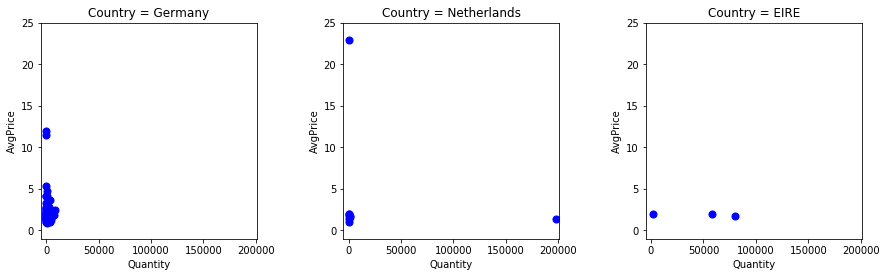

In [124]:
figure = plt.figure(figsize=(12, 3))

ax1 = figure.add_axes([0, 0, 0.25, 1], title = 'Country = Germany')
ax1.scatter(x=grouped[grouped['Country'].isin(['Germany'])].Quantity,
            y=grouped[grouped['Country'].isin(['Germany'])].AvgPrice, s=50, c='blue')
ax1.set_xlabel('Quantity')
ax1.set_ylabel('AvgPrice')
ax1.set_xlim(-5000, 201000)
ax1.set_ylim(-1, 25)


ax2 = figure.add_axes([0.35, 0, 0.25, 1], title = 'Country = Netherlands')
ax2.scatter(x=grouped[grouped['Country'].isin(['Netherlands'])].Quantity,
            y=grouped[grouped['Country'].isin(['Netherlands'])].AvgPrice, s=50, c='blue')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('AvgPrice')
ax2.set_xlim(-5000, 201000)
ax2.set_ylim(-1, 25)


ax3 = figure.add_axes([0.70, 0, 0.25, 1], title = 'Country = EIRE')
ax3.scatter(x=grouped[grouped['Country'].isin(['EIRE'])].Quantity,
            y=grouped[grouped['Country'].isin(['EIRE'])].AvgPrice, s=50, c='blue')
ax3.set_xlabel('Quantity')
ax3.set_ylabel('AvgPrice')
ax3.set_xlim(-5000, 201000)
ax3.set_ylim(-1, 25)

figure.show()

/home/tigerit/.virtualenvs/PracticePandas/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


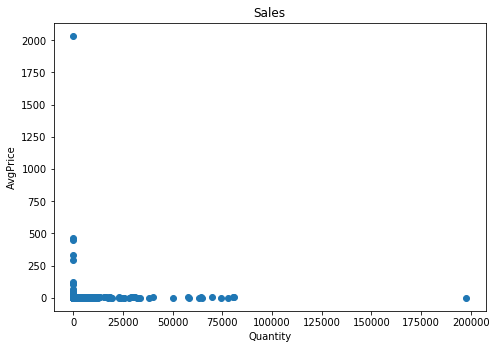

In [127]:
customer = retail.groupby(by='CustomerID')
customer = customer['Quantity', 'Revenue'].agg('sum')
customer['AvgPrice'] = customer.Revenue / customer.Quantity

figure = plt.figure()

ax = figure.add_axes([0, 0, 1, 1], title='Sales')
ax.scatter(x=customer.Quantity, y=customer.AvgPrice)
ax.set_xlabel('Quantity')
ax.set_ylabel('AvgPrice')

figure.show()

/home/tigerit/.virtualenvs/PracticePandas/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


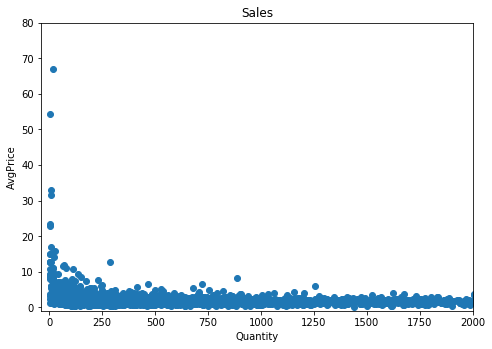

In [128]:
figure = plt.figure()

ax = figure.add_axes([0, 0, 1, 1], title='Sales')
ax.scatter(x=customer.Quantity, y=customer.AvgPrice)
ax.set_xlabel('Quantity')
ax.set_ylabel('AvgPrice')
ax.set_xlim(-40, 2000)
ax.set_ylim(-1, 80)

figure.show()

In [129]:
import numpy as np

price_start = 0
price_end = 50
price_interval = 1

intervals = np.arange(price_start, price_end, price_interval)

revenue_per_price = retail.groupby(pd.cut(retail.UnitPrice, intervals)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

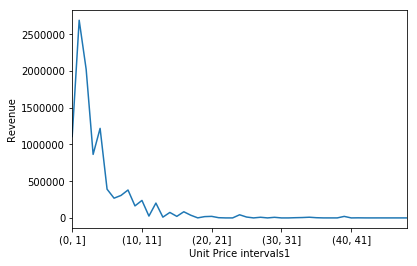

In [130]:
revenue_per_price.plot()

plt.xlabel('Unit Price intervals' + str(price_interval))
plt.ylabel('Revenue')
plt.show()